In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf

from scipy.stats import norm
from datetime import datetime, timedelta,date

# Impoting DataSets From github

In [2]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_confirmed = df_confirmed.drop(['Lat', 'Long'],axis=1)
df_confirmed.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939
1,NaN,Albania,0,0,0,0,0,0,0,0,...,584,609,634,663,678,712,726,736,750,766
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848


In [25]:
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_covid19.head(3)

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Australia,2020-04-30 17:32:33,-25.0000,133.0000,6754,92,5717,945,26.528199,NaN,NaN,1.362156,36.0,AUS
1,Austria,2020-04-30 17:32:33,47.5162,14.5501,15452,584,12907,1961,171.566886,NaN,NaN,3.779446,40.0,AUT
2,Canada,2020-04-30 17:32:33,60.0010,-95.0010,53907,3259,21187,29461,142.401269,NaN,NaN,6.045597,124.0,CAN


# Cleaning Data

In [4]:
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)

# Corona Virus Spread Across Globe Over Time

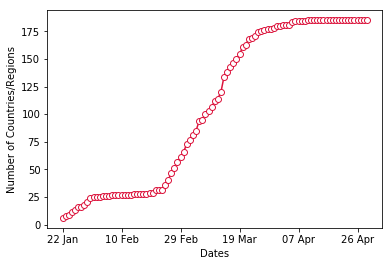

In [5]:
case_nums_country = df_confirmed.groupby("Country/Region").sum().apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

plt.plot(d, case_nums_country, color='crimson', linestyle='-', marker='o', markersize=6, markerfacecolor='#ffffff')

plt.xlabel("Dates")
plt.ylabel("Number of Countries/Regions")
plt.xticks(list(np.arange(0,len(d),int(len(d)/5))),d[:-1:int(len(d)/5)]+[d[-1]])

plt.show()


# Top 10 Countries

### Highest Number of Confirmed Cases

In [6]:
df_covid19.sort_values(by='Confirmed', ascending=False, inplace=True)
top_10_cases = df_covid19.head(10)

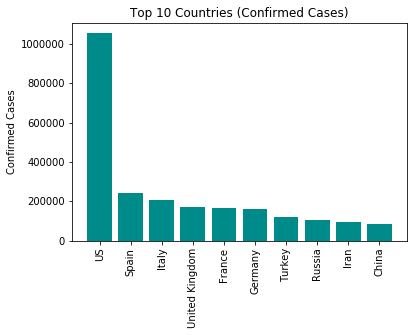

In [7]:
plt.bar('Country_Region', 'Confirmed', data=top_10_cases, color='darkcyan')

plt.ylabel('Confirmed Cases')
plt.title("Top 10 Countries (Confirmed Cases)")

plt.xticks(rotation=90)
plt.show()

### Highest Number of Deaths Reported

In [27]:
df_covid19.sort_values(by='Deaths', ascending=False, inplace=True)
top_10_deaths = df_covid19.head(10)

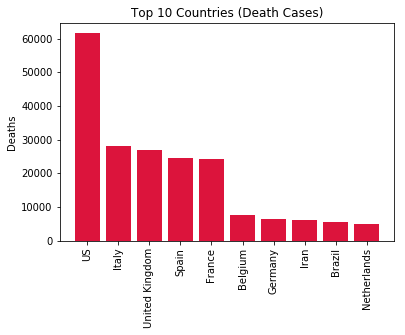

In [9]:
plt.bar('Country_Region', 'Deaths', data=top_10_deaths, color='crimson')

plt.ylabel('Deaths')
plt.title("Top 10 Countries (Death Cases)")

plt.xticks(rotation=90)
plt.show()

### Highest Number Of Pending Cases

In [10]:
df_covid19.sort_values(by='Active', ascending=False, inplace=True)
top_10_active = df_covid19.head(10)

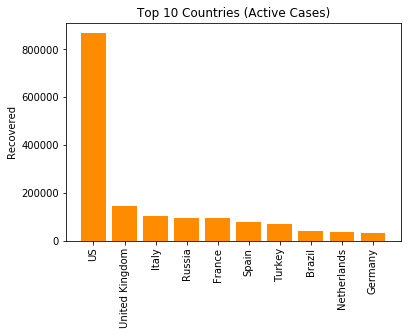

In [11]:
plt.bar('Country_Region', 'Active', data=top_10_active, color='darkorange')

plt.ylabel('Recovered')
plt.title("Top 10 Countries (Active Cases)")

plt.xticks(rotation=90)
plt.show()

### Highest Number Of Recovered Cases

In [12]:
df_covid19.sort_values(by='Recovered', ascending=False, inplace=True)
top_10_recovered = df_covid19.head(10)

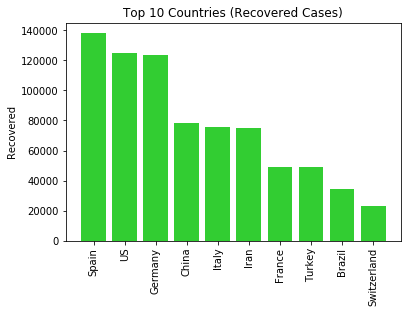

In [13]:
plt.bar('Country_Region', 'Recovered', data=top_10_recovered, color='limegreen')

plt.ylabel('Recovered')
plt.title("Top 10 Countries (Recovered Cases)")

plt.xticks(rotation=90)
plt.show()

### Highest Percentage Recovered Out Of Total Closed Cases

    For Countries that reported most recovered cases which has the highest percentage of recoveries out of closed cases.

C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


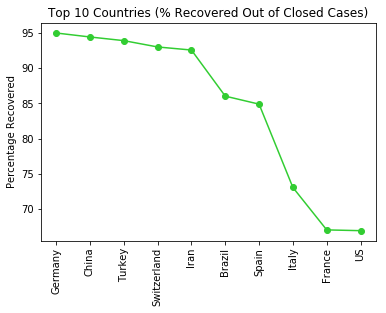

In [14]:
top_10_recovered['Percentage Recovered'] = top_10_recovered['Recovered']/(top_10_recovered['Confirmed'] - top_10_recovered['Active']) * 100

top_10_recovered.sort_values(by='Percentage Recovered', ascending=False, inplace=True)

plt.plot('Country_Region', 'Percentage Recovered', data=top_10_recovered, color='limegreen', marker='o')

plt.ylabel('Percentage Recovered')
plt.title("Top 10 Countries (% Recovered Out of Closed Cases)")

plt.xticks(rotation=90)
plt.show()

### Highest Percentage of Deaths Out Of Total Closed Cases

    For Countries that reported most death cases which has the highest percentage of death cases out of closed cases?

C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Usharab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


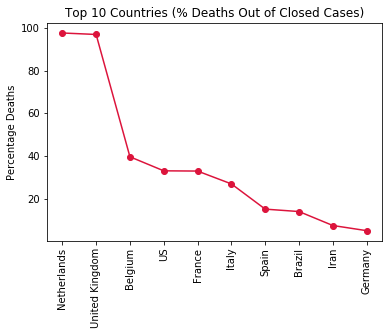

In [15]:
top_10_deaths['Percentage Deaths'] = top_10_deaths['Deaths']/(top_10_deaths['Confirmed'] - top_10_deaths['Active']) * 100


top_10_deaths.sort_values(by='Percentage Deaths', ascending=False, inplace=True)

plt.plot('Country_Region', 'Percentage Deaths', data=top_10_deaths, color='crimson', marker='o')

plt.ylabel('Percentage Deaths')
plt.title("Top 10 Countries (% Deaths Out of Closed Cases)")

plt.xticks(rotation=90)
plt.show()

# Global Average of Confirmed Cases & Number of Countries Above Global Average

In [16]:
print('Number OF Countries Effected By Corona: ', df_covid19.Confirmed.describe()['count'])
print('Mean OF Corfirmed Cases: ', df_covid19.Confirmed.describe()['mean'])

confirmed = df_covid19['Confirmed']
confirmed = confirmed[df_covid19.Confirmed > df_covid19.Confirmed.mean()]
print('Countries With More Confirmed Cases than Global Mean: ', confirmed.describe()['count'])

Number OF Countries Effected By Corona:  187.0
Mean OF Corfirmed Cases:  17367.101604278076
Countries With More Confirmed Cases than Global Mean:  23.0


# Global Average of Death & Number of Countries Above Global Average

In [17]:
print('Mean of Global Deaths: ', df_covid19.Deaths.describe()['mean'])

deaths = df_covid19['Deaths']
deaths = deaths[df_covid19.Deaths > df_covid19.Deaths.mean()]
print('Countries With More Deaths than Global Mean:', deaths.describe()['count'])

Mean of Global Deaths:  1233.235294117647
Countries With More Deaths than Global Mean: 16.0


# Global Percentage Recovered Out of Closed Cases & Number of Countries Above Global Percentgae

In [18]:
global_percent = df_covid19['Recovered'].sum()/(df_covid19['Confirmed'].sum() - df_covid19['Active'].sum()) * 100
print("Global Percentage Recovered Out of CLosed Cases: ", global_percent)

country_wise = df_covid19['Recovered']/(df_covid19['Confirmed'] - df_covid19['Active']) * 100
country_wise = country_wise[country_wise > global_percent]
print('Number of Countries with % Recovered greater than global %: ',country_wise.describe()['count'])

Global Percentage Recovered Out of CLosed Cases:  81.34857377631228
Number of Countries with % Recovered greater than global %:  139.0


# Global Percentage Deaths Out of Closed Cases & Number of Countries Above Global Percentgae

In [19]:
global_percent = df_covid19['Deaths'].sum()/(df_covid19['Confirmed'].sum() - df_covid19['Active'].sum()) * 100
print("Global Percentage Deaths Out of CLosed Cases: ", global_percent)

country_wise = df_covid19['Deaths']/(df_covid19['Confirmed'] - df_covid19['Active']) * 100
country_wise = country_wise[country_wise > global_percent]
print('Number of Countries with % Deaths greater than global %: ',country_wise.describe()['count'])

Global Percentage Deaths Out of CLosed Cases:  18.65142622368771
Number of Countries with % Deaths greater than global %:  44.0


# Probability Mass Function of Confirmed Cases

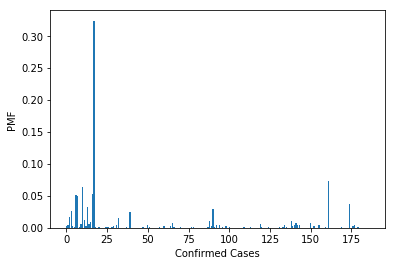

In [20]:
pmf = Pmf(df_covid19['Confirmed'])
pmf.normalize()
pmf.bar()

plt.xlabel('Confirmed Cases')
plt.ylabel('PMF')
plt.show()

# Probability Mass Function of Deaths

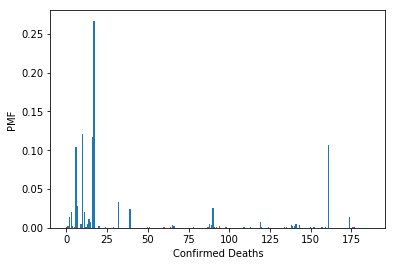

In [21]:
pmf = Pmf(df_covid19['Deaths'])
pmf.normalize()
pmf.bar()

plt.xlabel('Confirmed Deaths')
plt.ylabel('PMF')
plt.show()

# Probability Mass Function of Recovered

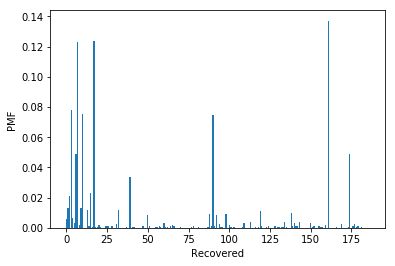

In [22]:
pmf = Pmf(df_covid19['Recovered'])
pmf.normalize()
pmf.bar()

plt.xlabel('Recovered')
plt.ylabel('PMF')
plt.show()

# Relationship Between Different Factors

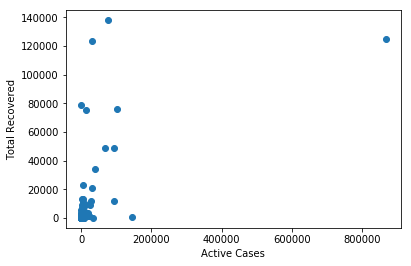

In [23]:
plt.plot('Active', 'Recovered', data=df_covid19, marker='o', linestyle='none')

plt.xlabel('Active Cases')
plt.ylabel('Total Recovered')

plt.show()

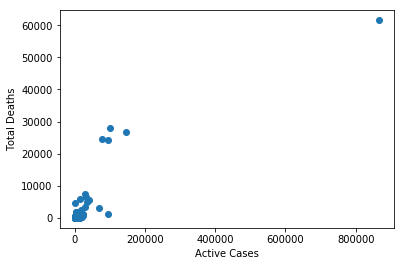

In [24]:
plt.plot( 'Active', 'Deaths', data=df_covid19, marker='o', linestyle='none')

plt.xlabel('Active Cases')
plt.ylabel('Total Deaths')

plt.show()